In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_flight = pd.read_csv("Flight_Data.csv")

In [3]:
df_flight.head()

,Unnamed: 0,Airline,Departure,Arrival,Dep_time,Arr_time,Duration,Journey_Type,Price
0,0,IndiGo,New Delhi,Varanasi,15:30,16:50,1h 20m,1 Stop,"2,060"
1,1,IndiGo,New Delhi,Varanasi,05:05,06:30,1h 25m,1 Stop,"2,060"
2,2,Go First,New Delhi,Varanasi,09:10,10:40,1h 30m,2 Stop(s),"2,060"
3,3,IndiGo,New Delhi,Varanasi,17:45,19:20,1h 35m,1 Stop,"2,060"
4,4,SpiceJet,New Delhi,Varanasi,17:30,19:00,1h 30m,1 Stop,"2,068"


In [4]:
df_flight.shape

(1562, 9)

In [5]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1562 non-null   int64 
 1   Airline       1562 non-null   object
 2   Departure     1562 non-null   object
 3   Arrival       1562 non-null   object
 4   Dep_time      1562 non-null   object
 5   Arr_time      1562 non-null   object
 6   Duration      1562 non-null   object
 7   Journey_Type  1562 non-null   object
 8   Price         1562 non-null   object
dtypes: int64(1), object(8)
memory usage: 110.0+ KB


In [6]:
df_flight.isnull().sum()

Unnamed: 0      0
Airline         0
Departure       0
Arrival         0
Dep_time        0
Arr_time        0
Duration        0
Journey_Type    0
Price           0
dtype: int64

###  Exploratory Data Analysis :

In [7]:
sns.set_style('darkgrid')

In [8]:
df_flight.columns

Index(['Unnamed: 0', 'Airline', 'Departure', 'Arrival', 'Dep_time', 'Arr_time',
       'Duration', 'Journey_Type', 'Price'],
      dtype='object')

In [9]:
for column in df_flight:
    print(f'{column} : {df_flight[column].unique()}')

Unnamed: 0 : [   0    1    2 ... 1559 1560 1561]
Airline : ['IndiGo' 'Go First' 'SpiceJet' 'Vistara' 'Air India' 'Air Asia' 'TruJet']
Departure : ['New Delhi' 'Mumbai' 'Bangalore' 'Chennai' 'Hyderabad' 'Pune' 'Kochi'
 'Kolkata']
Arrival : ['Varanasi' 'Ahmedabad' 'Jammu' 'Goa' 'Hyderabad' 'Nagpur' 'Kochi'
 'Bagdogra' 'Indore' 'New Delhi' 'Chennai' 'Bangalore' 'Kolkata'
 'Chandigarh' 'Mumbai' 'Visakhapatnam' 'Pune']
Dep_time : ['15:30' '05:05' '09:10' '17:45' '17:30' '06:25' '13:20' '18:55' '10:25'
 '10:15' '05:45' '06:00' '17:50' '20:40' '21:00' '19:00' '21:40' '02:00'
 '22:30' '10:20' '09:30' '05:50' '16:55' '12:50' '20:00' '10:40' '09:00'
 '07:30' '19:50' '11:40' '08:50' '07:00' '17:15' '06:05' '17:10' '15:05'
 '13:40' '14:20' '17:20' '05:15' '06:40' '13:30' '22:15' '11:25' '06:10'
 '20:10' '18:30' '20:20' '19:55' '15:00' '13:00' '07:50' '05:00' '21:20'
 '06:55' '19:10' '08:45' '10:35' '07:25' '12:55' '08:00' '10:30' '09:20'
 '17:00' '13:10' '14:15' '07:35' '13:25' '09:35' '15:15' '10

In [10]:
df_flight['Price'] = df_flight['Price'].str.replace(',','').astype('int') 

In [11]:
df_flight['Dep_hour'] = pd.to_datetime(df_flight['Dep_time']).dt.hour


df_flight['Dep_min'] = pd.to_datetime(df_flight['Dep_time']).dt.minute


df_flight.drop(['Dep_time'],axis=1,inplace= True)


In [12]:
df_flight['Arr_time'] = df_flight['Arr_time'].str.replace('\n','')

In [13]:
df_flight['Arr_time'] = df_flight['Arr_time'].str.replace('+','')

In [14]:
df_flight['Arr_time'] = df_flight['Arr_time'].str.replace('1','')

In [15]:
df_flight['Arr_time'] = df_flight['Arr_time'].str.replace('day','')

In [16]:
df_flight['Arr_time'].unique()

array(['6:50', '06:30', '0:40', '9:20', '9:00', '08:20', '4:45', '20:0',
       ':55', ':35', '5:35', '2:30', '2:40  ', '5:35  ', '3:20  ', '3:20',
       '3:40', '2:40', '6:25', '06:50', '08:5', '5:05', '23:50', '3:0',
       '07:30', '07:40', '7:05', '2:50', '9:55', '22:00', '07:55  ',
       '20:5', '5:30', '09:0', '20:40', '0:20', '7:35', '4:25', '22:55',
       '7:00', '9:05', '20:25', '8:30', '2:55', '08:50', '0:45',
       '00:05  ', '8:20', '4:35', ':05', '2:20', '3:30', '2:45', '5:50',
       '3:5  ', '3:5', '00:35  ', '03:35', '23:00', '0:00  ', '05:55',
       '0:5', '06:25', '5:5', '6:30', '06:0', '23:25', '22:25', '7:45',
       '8:00', '4:05  ', '20:30', '2:35', '00:35 2 s', '23:45', '23:0',
       '4:05', '7:0', '4:55  ', '5:25  ', '3:30  ', '22:35', '2:20  ',
       '7:00  ', '3:50  ', '4:55', '06:50  ', '08:45  ', '7:40', '23:20',
       '5:25', '08:30  ', '09:30  ', '07:35', '07:50', '2:25', '20:55',
       '08:30', '2:05', '2:5', '8:35', '20:55  ', '9:20  ', '9:5',
 

In [17]:
df_flight['Arr_time'] = pd.to_datetime(df_flight['Arr_time'], errors = 'coerce')

In [18]:
df_flight['Arr_hour'] = pd.to_datetime(df_flight['Arr_time']).dt.hour

df_flight['Arr_min'] = pd.to_datetime(df_flight['Arr_time']).dt.minute

df_flight.drop(['Arr_time'],axis=1,inplace=True)

In [19]:
df_flight=df_flight.rename(columns={'Journey_Type' :'Total_Stops'})
df_flight=df_flight.rename(columns={'Departure' :'Origin'})
df_flight=df_flight.rename(columns={'Arrival' :'Destination'})

In [20]:
df_flight['Total_Stops'] = df_flight['Total_Stops'].str.replace('1 Stop','1').replace('2 Stop(s)','2').replace('3 Stop(s)','3').replace('4 Stop(s)','4').replace('Non Stop','0').astype('int64')

In [21]:
df_flight['Total_Stops'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [22]:
duration = list(df_flight['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2: #checking if duraation contains only hrs or min
        if "h" in duration[i]:
            duration['i']=duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i]="0h " + duration[i]   # Adds 0 hour
            
        
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

df_flight["Duration_hours"] = duration_hours
df_flight["Duration_mins"] = duration_mins

df_flight.drop(['Duration'],axis=1,inplace=True)

In [24]:
df_flight.head()

,Unnamed: 0,Airline,Origin,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,0,IndiGo,New Delhi,Varanasi,1,2060,15,30,6.0,50.0,1,20
1,1,IndiGo,New Delhi,Varanasi,1,2060,5,5,6.0,30.0,1,25
2,2,Go First,New Delhi,Varanasi,2,2060,9,10,0.0,40.0,1,30
3,3,IndiGo,New Delhi,Varanasi,1,2060,17,45,9.0,20.0,1,35
4,4,SpiceJet,New Delhi,Varanasi,1,2068,17,30,9.0,0.0,1,30


In [25]:
df_flight.drop(['Unnamed: 0'],axis=1,inplace=True)

In [26]:
df_flight.head()

,Airline,Origin,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,New Delhi,Varanasi,1,2060,15,30,6.0,50.0,1,20
1,IndiGo,New Delhi,Varanasi,1,2060,5,5,6.0,30.0,1,25
2,Go First,New Delhi,Varanasi,2,2060,9,10,0.0,40.0,1,30
3,IndiGo,New Delhi,Varanasi,1,2060,17,45,9.0,20.0,1,35
4,SpiceJet,New Delhi,Varanasi,1,2068,17,30,9.0,0.0,1,30


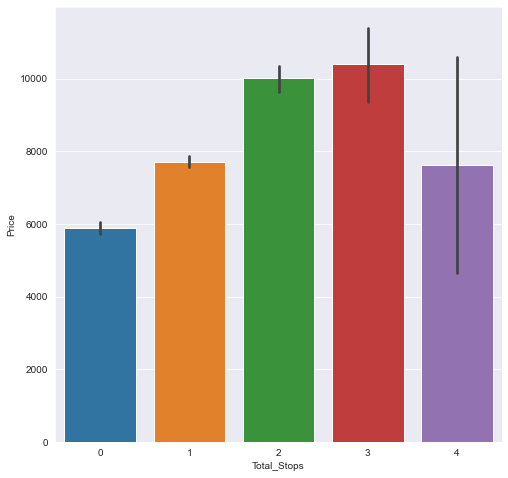

In [27]:
plt.figure(figsize=(8,8))
sns.barplot(x='Total_Stops',y='Price',data=df_flight)

<Figure size 576x576 with 0 Axes>

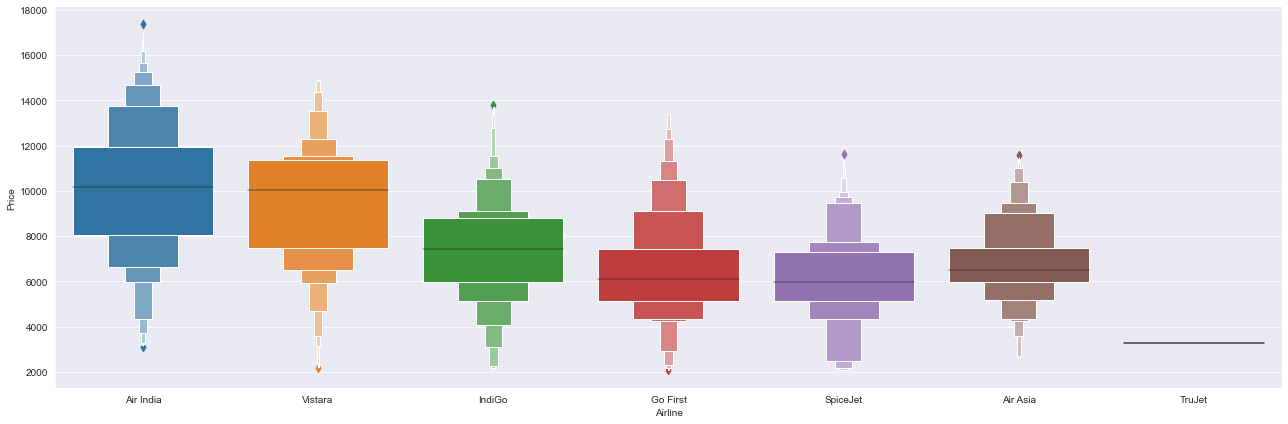

In [28]:
plt.figure(figsize=(8,8))
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df_flight.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<Figure size 1080x864 with 0 Axes>

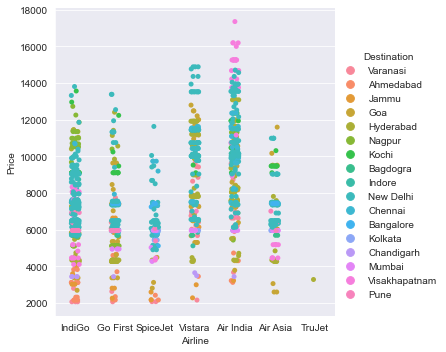

In [29]:
plt.figure(figsize=(15,12)) # Airline vs Price by destination
sns.catplot(x = 'Airline', y = 'Price', hue = 'Destination', data = df_flight)

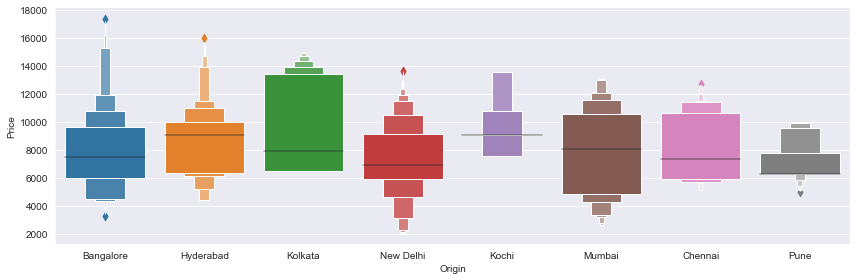

In [30]:
# Source vs Price
sns.catplot(y = "Price", x = "Origin", data = df_flight.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

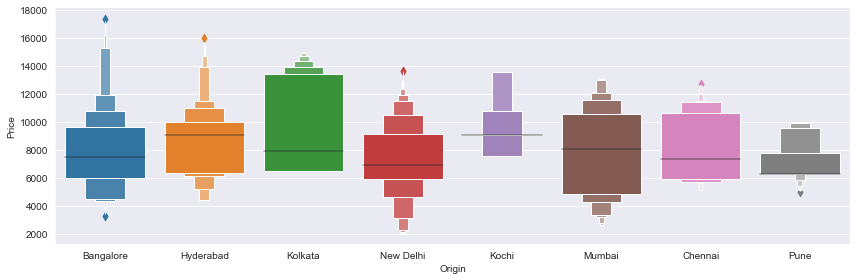

In [31]:
# Destination vs Price
sns.catplot(y = "Price", x = "Origin", data = df_flight.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [32]:
df_flight.isnull().sum()

Airline             0
Origin              0
Destination         0
Total_Stops         0
Price               0
Dep_hour            0
Dep_min             0
Arr_hour          281
Arr_min           281
Duration_hours      0
Duration_mins       0
dtype: int64

In [33]:
#using mean function to fil the missing value in 'sex' column
df_flight['Arr_hour']=df_flight['Arr_hour'].fillna(df_flight.groupby("Origin")['Arr_hour'].transform("mean"))
df_flight['Arr_min']=df_flight['Arr_min'].fillna(df_flight.groupby("Origin")['Arr_min'].transform("mean"))

In [34]:
df_flight.isnull().sum()

Airline           0
Origin            0
Destination       0
Total_Stops       0
Price             0
Dep_hour          0
Dep_min           0
Arr_hour          0
Arr_min           0
Duration_hours    0
Duration_mins     0
dtype: int64

### Handling Categorical Data

In [35]:
df_flight=pd.get_dummies(df_flight)

In [36]:
pd.set_option('display.max_columns',100)
df_flight.head()

,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air Asia,Airline_Air India,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_TruJet,Airline_Vistara,Origin_Bangalore,Origin_Chennai,Origin_Hyderabad,Origin_Kochi,Origin_Kolkata,Origin_Mumbai,Origin_New Delhi,Origin_Pune,Destination_Ahmedabad,Destination_Bagdogra,Destination_Bangalore,Destination_Chandigarh,Destination_Chennai,Destination_Goa,Destination_Hyderabad,Destination_Indore,Destination_Jammu,Destination_Kochi,Destination_Kolkata,Destination_Mumbai,Destination_Nagpur,Destination_New Delhi,Destination_Pune,Destination_Varanasi,Destination_Visakhapatnam
0,1,2060,15,30,6.0,50.0,1,20,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,2060,5,5,6.0,30.0,1,25,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,2060,9,10,0.0,40.0,1,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,2060,17,45,9.0,20.0,1,35,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2068,17,30,9.0,0.0,1,30,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Feature Selection 

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,



In [37]:
df_flight.columns

Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_Go First', 'Airline_IndiGo',
       'Airline_SpiceJet', 'Airline_TruJet', 'Airline_Vistara',
       'Origin_Bangalore', 'Origin_Chennai', 'Origin_Hyderabad',
       'Origin_Kochi', 'Origin_Kolkata', 'Origin_Mumbai', 'Origin_New Delhi',
       'Origin_Pune', 'Destination_Ahmedabad', 'Destination_Bagdogra',
       'Destination_Bangalore', 'Destination_Chandigarh',
       'Destination_Chennai', 'Destination_Goa', 'Destination_Hyderabad',
       'Destination_Indore', 'Destination_Jammu', 'Destination_Kochi',
       'Destination_Kolkata', 'Destination_Mumbai', 'Destination_Nagpur',
       'Destination_New Delhi', 'Destination_Pune', 'Destination_Varanasi',
       'Destination_Visakhapatnam'],
      dtype='object')

In [38]:
df_columns = df_flight[['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hours', 'Duration_mins']]

In [39]:
df_columns.head()

,Total_Stops,Price,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,1,2060,15,30,6.0,50.0,1,20
1,1,2060,5,5,6.0,30.0,1,25
2,2,2060,9,10,0.0,40.0,1,30
3,1,2060,17,45,9.0,20.0,1,35
4,1,2068,17,30,9.0,0.0,1,30


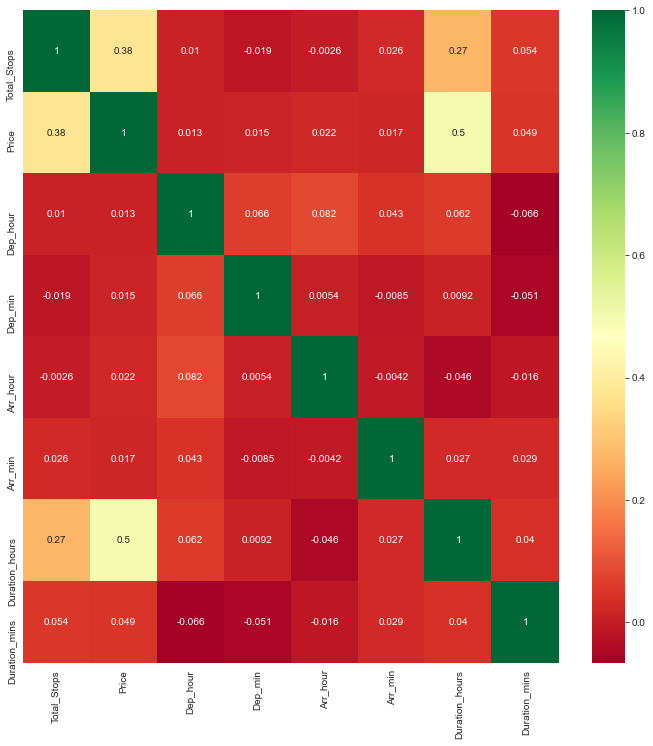

In [40]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize = (12,12))
sns.heatmap(df_columns.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [41]:
x = df_flight[['Total_Stops', 'Dep_hour', 'Dep_min', 'Arr_hour', 'Arr_min',
       'Duration_hours', 'Duration_mins', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_Go First', 'Airline_IndiGo',
       'Airline_SpiceJet', 'Airline_TruJet', 'Airline_Vistara',
       'Origin_Bangalore', 'Origin_Chennai', 'Origin_Hyderabad',
       'Origin_Kochi', 'Origin_Kolkata', 'Origin_Mumbai', 'Origin_New Delhi',
       'Origin_Pune', 'Destination_Ahmedabad', 'Destination_Bagdogra',
       'Destination_Bangalore', 'Destination_Chandigarh',
       'Destination_Chennai', 'Destination_Goa', 'Destination_Hyderabad',
       'Destination_Indore', 'Destination_Jammu', 'Destination_Kochi',
       'Destination_Kolkata', 'Destination_Mumbai', 'Destination_Nagpur',
       'Destination_New Delhi', 'Destination_Pune', 'Destination_Varanasi',
       'Destination_Visakhapatnam']]


y = df_flight['Price']

In [42]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[2.77070159e-02 1.90464215e-02 2.50664240e-02 2.48610026e-02
 2.46169805e-02 1.81469097e-01 2.24968578e-02 3.48177038e-03
 1.46976296e-01 8.46018990e-03 1.76691741e-02 1.97969910e-03
 2.40296461e-04 1.27444947e-01 7.64456340e-03 1.31720646e-02
 7.97983602e-03 1.11861587e-02 3.80266518e-02 1.65209678e-02
 2.12760987e-02 3.10244842e-03 4.46469274e-02 1.28630790e-04
 2.32099984e-03 1.23574951e-03 2.74755439e-02 1.14298383e-02
 8.70119533e-03 2.84367558e-03 4.33078263e-03 2.92384619e-02
 8.57543188e-05 1.25533482e-03 1.95870648e-02 2.74072227e-02
 1.56039490e-03 1.49480171e-02 5.23794447e-02]


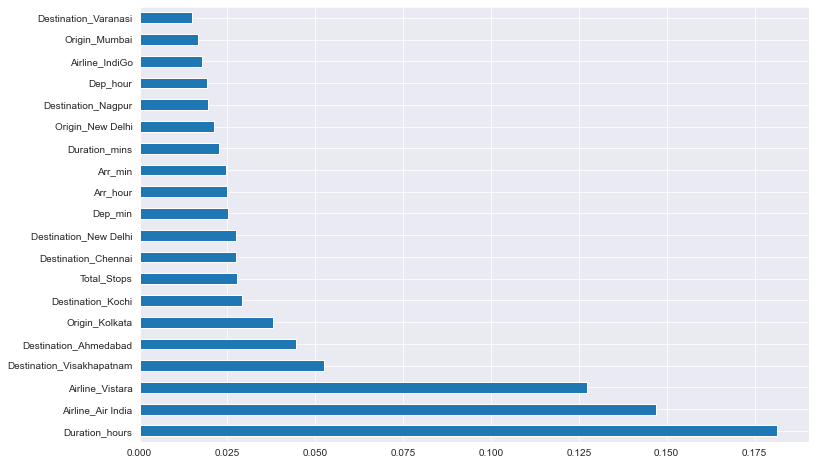

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Model Building

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [95]:
X = df_flight.drop(['Price'],axis=1)
y= df_flight['Price']

In [96]:
print(X.shape)
print(y.shape)

(1562, 39)
(1562,)


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)

In [98]:
x_scale

array([[-0.21760653,  0.41792969,  0.19809389, ..., -0.14462031,
         5.7407771 , -0.21982299],
       [-0.21760653, -1.37107051, -1.20582016, ..., -0.14462031,
         5.7407771 , -0.21982299],
       [ 1.55271325, -0.65547043, -0.92503735, ..., -0.14462031,
         5.7407771 , -0.21982299],
       ...,
       [-0.21760653, -0.47657041, -0.08268892, ..., -0.14462031,
        -0.17419245, -0.21982299],
       [-0.21760653, -0.47657041, -0.08268892, ..., -0.14462031,
        -0.17419245, -0.21982299],
       [-0.21760653, -0.47657041, -0.08268892, ..., -0.14462031,
        -0.17419245, -0.21982299]])

In [99]:
# from sklearn.decomposition import PCA
# pca = PCA(0.95)
# x_pca = pca.fit_transform(X)

In [100]:
# x_pca.shape

In [101]:
# pca.explained_variance_ratio_
# #pca.n_components_

In [109]:
X_train, X_test, y_train, y_test  = train_test_split(x_scale, y, test_size=0.30,random_state=42)

In [110]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
gboost=GradientBoostingRegressor()
xgboost=XGBRegressor()
print("Model is created")

Model is created


In [111]:
lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
adb.fit(X_train, y_train)
svm.fit(X_train, y_train)
gboost.fit(X_train, y_train)
xgboost.fit(X_train, y_train)
print("Model is trained")

Model is trained


In [112]:
print("lr_score",lr.score(X_train, y_train))
print("knn_score",knn.score(X_train, y_train))
print("dt_score",dt.score(X_train, y_train))
print("rf_score",rf.score(X_train, y_train))
print("adb_score",adb.score(X_train, y_train))
print("svm_score",svm.score(X_train, y_train))
print("gboost_score",gboost.score(X_train, y_train))
print("xgboost_score",xgboost.score(X_train, y_train))

lr_score 0.6545256430920336
knn_score 0.7983554177227351
dt_score 0.9999524243951425
rf_score 0.97693206560485
adb_score 0.5856223329669882
svm_score -0.022058439806933006
gboost_score 0.8215614421496338
xgboost_score 0.9974358831133999


### Model Evaluation

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [114]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)
gboost_pred_y = svm.predict(X_test)
xgboost_pred_y = svm.predict(X_test)

In [115]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))
print("gboost_score",mean_squared_error(y_test,gboost_pred_y))
print("xgboost_score",mean_squared_error(y_test,xgboost_pred_y))

lr_score 1.7037812648936504e+34
knn_score 2260411.2698507463
dt_score 2478340.4946695096
rf_score 1498075.2163815699
adb_score 3310945.0891640517
svm_score 7868798.934144937
gboost_score 7868798.934144937
xgboost_score 7868798.934144937


### Cross validation:

In [118]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=5,shuffle=True)
k_f

KFold(n_splits=5, random_state=None, shuffle=True)

In [119]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,X,y,cv=5).mean())
print("Cross validation score for gboost model","=>",cross_val_score(gboost,X,y,cv=5).mean())
print("Cross validation score for xgboost model","=>",cross_val_score(xgboost,X,y,cv=5).mean())

Cross validation score for lr model => 0.16195505955216938
Cross validation score for knn model => -0.12016245152150842
Cross validation score for dt model => 0.09399392580193404
Cross validation score for rf model => 0.4023648404733654
Cross validation score for adb model => 0.3289283108437268
Cross validation score for svm model => -0.12340830350876501
Cross validation score for gboost model => 0.42984343393611
Cross validation score for xgboost model => 0.3931434961697732


### HyperParameter Tuning :

In [120]:
from sklearn.model_selection import GridSearchCV

In [121]:
dt.get_params().keys()  # to check the parameters

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [122]:
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
              'splitter' : ['best','random'],'max_depth':[10,20,30,40,50],
              'min_samples_split' : [2,3,4,5],'min_samples_leaf': [2,4,5],
              'max_features':['auto','sqrt','log2'],'max_leaf_nodes' : [10,20,30,40]}
param_grid

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
 'splitter': ['best', 'random'],
 'max_depth': [10, 20, 30, 40, 50],
 'min_samples_split': [2, 3, 4, 5],
 'min_samples_leaf': [2, 4, 5],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_leaf_nodes': [10, 20, 30, 40]}

In [123]:
gridsearch = GridSearchCV(dt,param_grid = param_grid,cv=5,verbose = 2 ,n_jobs =5)

In [124]:
gridsearch.fit(X_train,y_train) #hyper tuing for "Next_Tmax" label

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30, 40],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [125]:
gridsearch.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': 40,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [128]:
dt_hpy_tuning=DecisionTreeRegressor(criterion= 'friedman_mse',
 max_depth= 50,
 max_features='auto',
 max_leaf_nodes= 40,
 min_samples_leaf= 4,
 min_samples_split= 3,
 splitter= 'random')

In [129]:
dt_hpy_tuning.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=40,
                      min_samples_leaf=4, min_samples_split=3,
                      splitter='random')

In [135]:
dt_hpy_tuning.score(X_train, y_train)

0.7699103174367988

In [136]:
y_pred_dt = dt_hpy_tuning.predict(X_test)

In [137]:
mean_squared_error(y_test,y_pred_dt)

2378954.8716015876

As observed i am getting almost same accuarcy with or without hyperparameter tuing.so saving model both models without hypermeter tuning.

### Model saving

In [138]:
import pickle

In [139]:
Flight_price = 'Flight_price.pickle'

In [140]:
pickle.dump(dt,open(Flight_price,'wb'))